In [ ]:
!pip install scipy
!pip install seaborn

In [6]:
import numpy as np
import pandas as pd

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats, integrate
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 14

In [8]:
iris = pd.read_csv("/content/sample_data/iris.csv")
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.10,3.50,1.40,0.20,Setosa
1,4.90,3.00,1.40,0.20,Setosa
2,4.70,3.20,1.30,0.20,Setosa
3,4.60,3.10,1.50,0.20,Setosa
4,5.00,3.60,1.40,0.20,Setosa


In [9]:
dfSummary = iris.describe()
dfSummary

,sepal.length,sepal.width,petal.length,petal.width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


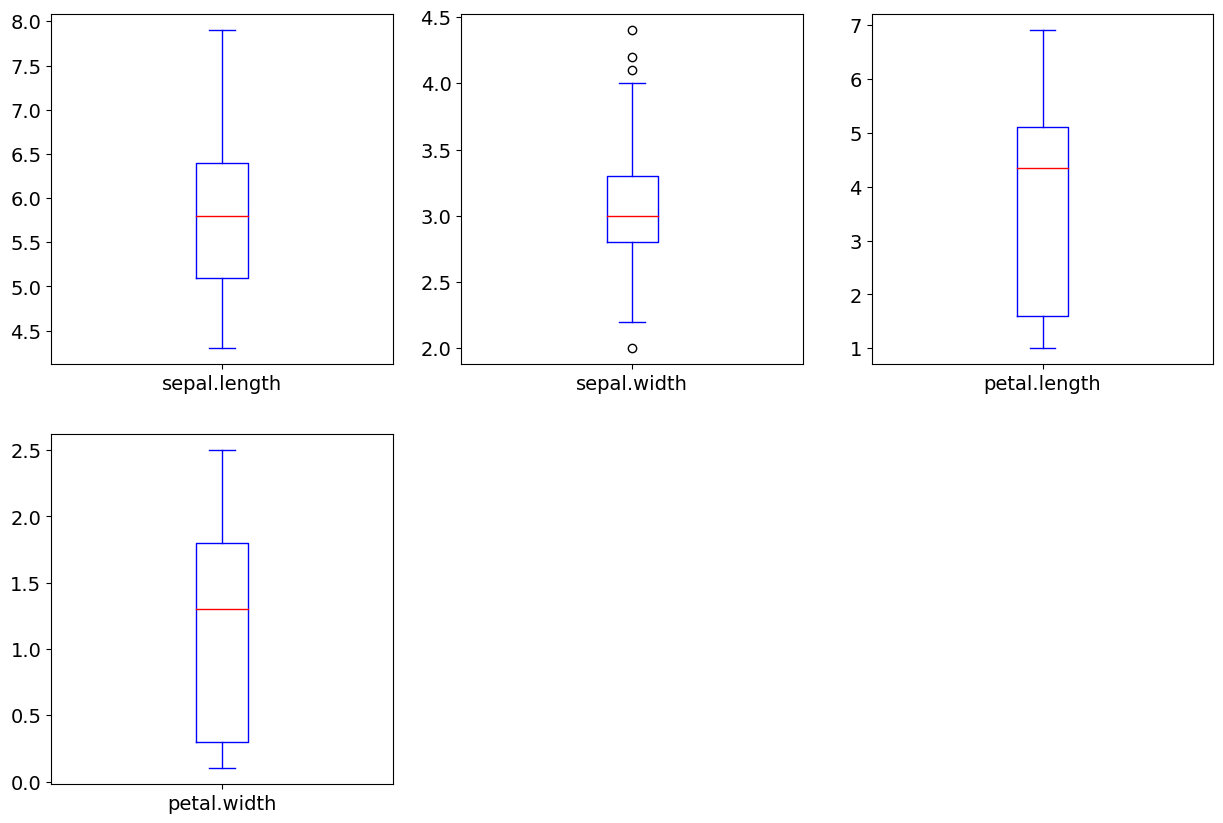

In [10]:
boxplot = iris.plot(kind = 'box', subplots = True, layout = (2,3), sharex = False, sharey = False, colormap = 'bwr', figsize = (15,10))

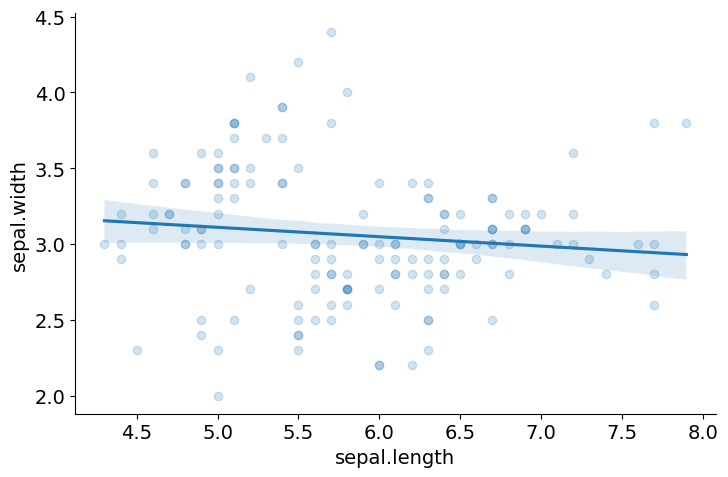

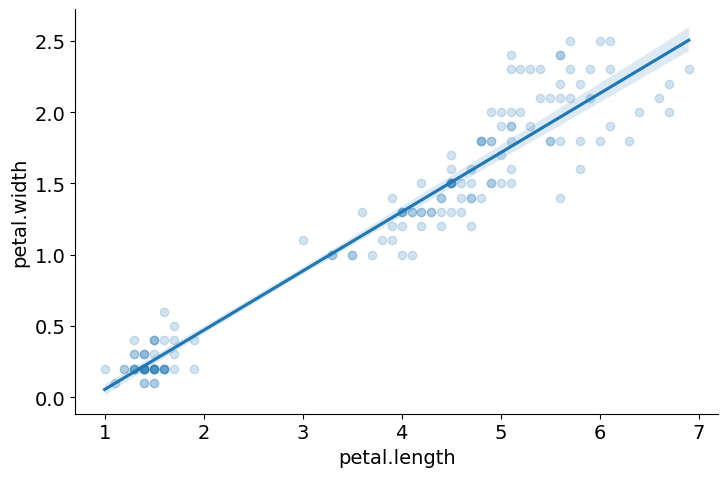

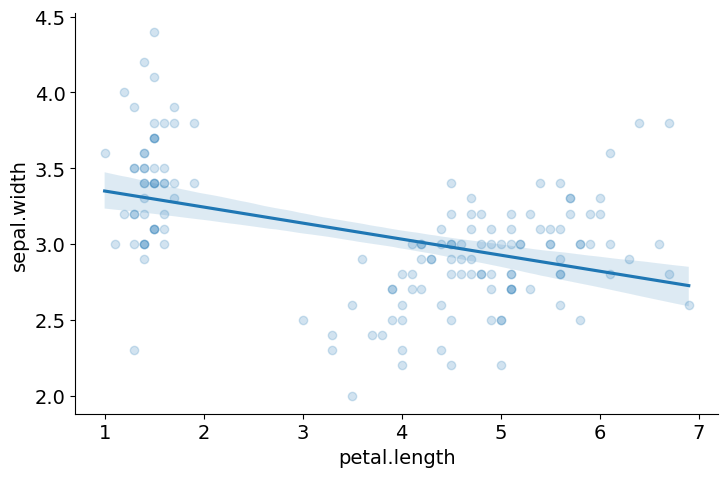

In [11]:
a = sns.lmplot(x = 'sepal.length', y = 'sepal.width', data = iris, aspect = 1.5, scatter_kws = {'alpha':0.2})
b = sns.lmplot(x = 'petal.length', y = 'petal.width', data = iris, aspect = 1.5, scatter_kws = {'alpha':0.2})
c = sns.lmplot(x = 'petal.length', y = 'sepal.width', data = iris, aspect = 1.5, scatter_kws = {'alpha':0.2})

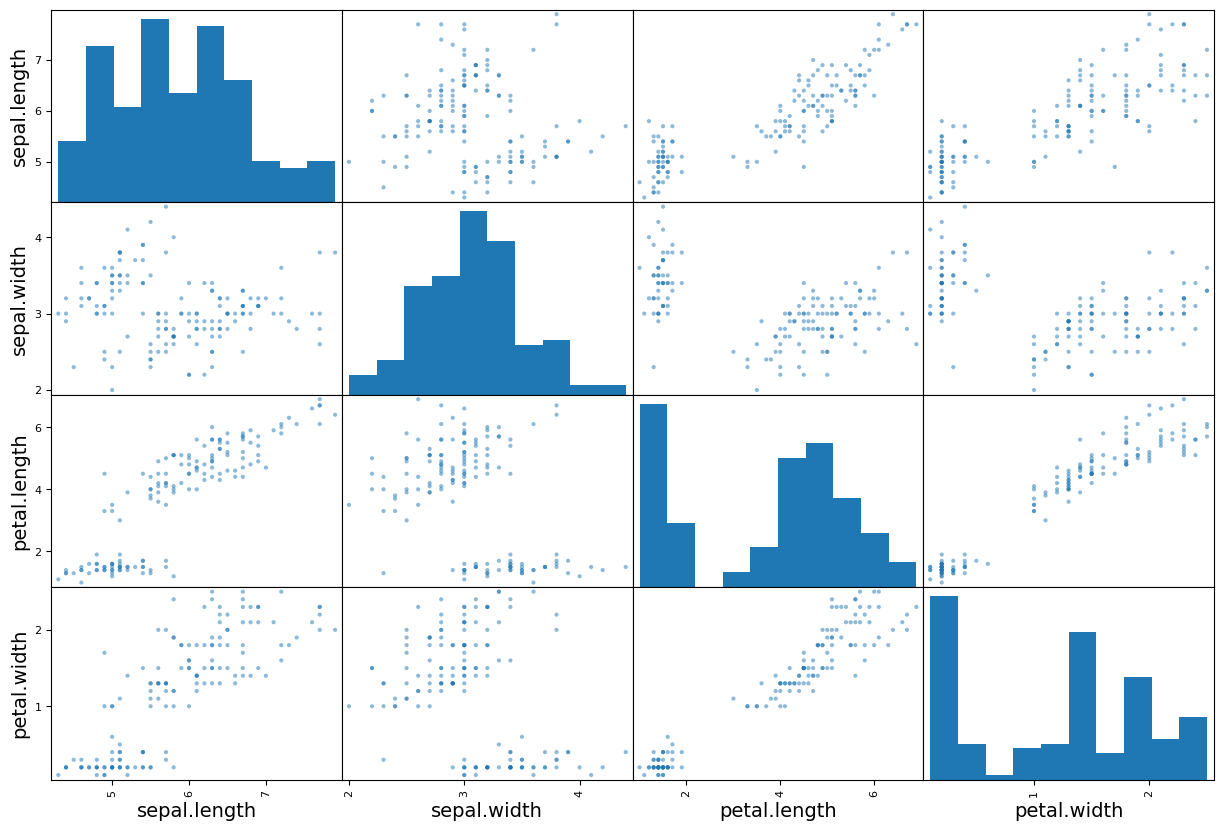

In [12]:
scatter = pd.plotting.scatter_matrix(iris, figsize = (15,10))

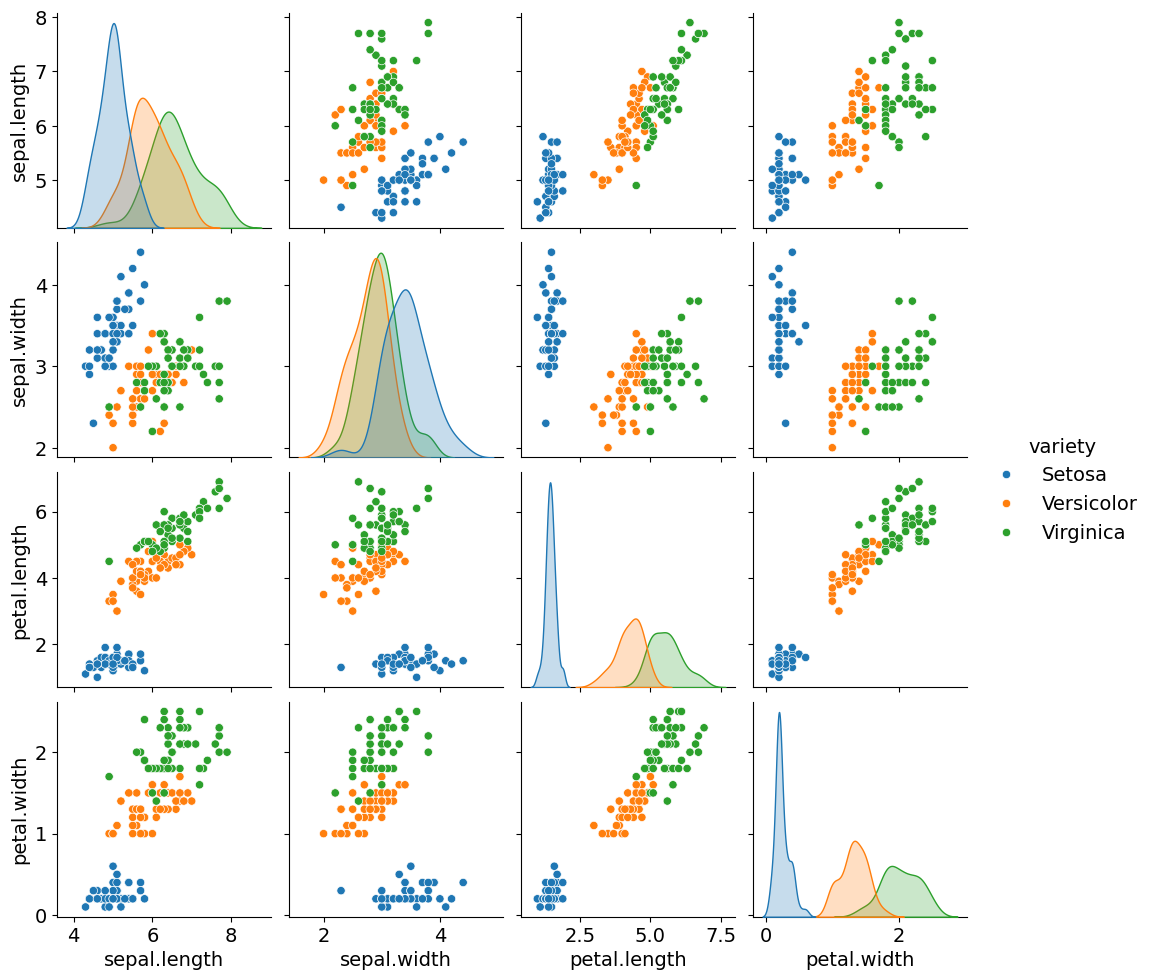

In [13]:
scatterplot = sns.pairplot(iris, hue = "variety")

In [14]:
inputCols = ['sepal.width']
outputVariable = ['sepal.length']
X = iris[inputCols]
Y = iris[outputVariable]

linreg = LinearRegression()
linreg.fit(X, Y)
print(linreg.intercept_)
print(linreg.coef_)
print("\n")
print('sepal.length =' + str(linreg.coef_) + '*sepal.width + ' + str(linreg.intercept_))
print('\n')
print('Holding constant fixed, a 1 cm increase in sepalWidth lead to decrease in sepalLength by ' + str(linreg.coef_) + ' cm')

[6.52622255]
[[-0.22336106]]


sepal.length =[[-0.22336106]]*sepal.width + [6.52622255]


Holding constant fixed, a 1 cm increase in sepalWidth lead to decrease in sepalLength by [[-0.22336106]] cm


In [15]:
inputCols = ['petal.width']
outputVariable = ['sepal.length']
X = iris[inputCols]
Y = iris[outputVariable]

linreg = LinearRegression()
linreg.fit(X, Y)
print(linreg.intercept_)
print(linreg.coef_)
print("\n")
print('sepal.length =' + str(linreg.coef_) + '*petal.width + ' + str(linreg.intercept_))
print('\n')
print('Holding constant fixed, a 1 cm increase in petalWidth lead to decrease in sepalLength by ' + str(linreg.coef_) + ' cm')

[4.77762942]
[[0.88858025]]


sepal.length =[[0.88858025]]*petal.width + [4.77762942]


Holding constant fixed, a 1 cm increase in petalWidth lead to decrease in sepalLength by [[0.88858025]] cm


In [16]:
inputCols = ['petal.width','petal.length','sepal.width']
outputVariable = ['sepal.length']
X = iris[inputCols]
Y = iris[outputVariable]

linreg = LinearRegression()
linreg.fit(X, Y)
print(linreg.intercept_)
print(linreg.coef_)
print("\n")
print('sepal.length =' + str(linreg.coef_) + '*indVars + ' + str(linreg.intercept_))
print('\n')
print('Holding constant fixed, a 1 cm increase in indvars' + str(inputCols) + ' lead to decrease in sepalLength by ' + str(linreg.coef_) + ' cm respectively')

[1.85599749]
[[-0.55648266  0.70913196  0.65083716]]


sepal.length =[[-0.55648266  0.70913196  0.65083716]]*indVars + [1.85599749]


Holding constant fixed, a 1 cm increase in indvars['petal.width', 'petal.length', 'sepal.width'] lead to decrease in sepalLength by [[-0.55648266  0.70913196  0.65083716]] cm respectively


In [17]:
inputCols = ['petal.length','sepal.width']
outputVariable = ['sepal.length']
X = iris[inputCols]
Y = iris[outputVariable]

linreg = LinearRegression()
linreg.fit(X, Y)
print(linreg.intercept_)
print(linreg.coef_)
print("\n")
print('sepal.length =' + str(linreg.coef_) + '*indVars + ' + str(linreg.intercept_))
print('\n')
print('Holding constant fixed, a 1 cm increase in indvars' + str(inputCols) + ' lead to decrease in sepalLength by ' + str(linreg.coef_) + ' cm respectively')

[2.24914016]
[[0.47192004 0.59552475]]


sepal.length =[[0.47192004 0.59552475]]*indVars + [2.24914016]


Holding constant fixed, a 1 cm increase in indvars['petal.length', 'sepal.width'] lead to decrease in sepalLength by [[0.47192004 0.59552475]] cm respectively


In [18]:
# Check for multicollinearity
import numpy as np
inputCols = ['petal.width', 'petal.length', 'sepal.width']
outputVariable = ['sepal.length']
X = iris[inputCols]
Y = iris[outputVariable]
corr = np.corrcoef(X, rowvar = 0)
print(inputCols)
print(corr)
print('\n')
print(np.linalg.det(corr))

print('\n')

['petal.width', 'petal.length', 'sepal.width']
[[ 1.          0.96286543 -0.36612593]
 [ 0.96286543  1.         -0.4284401 ]
 [-0.36612593 -0.4284401   1.        ]]


0.05735702290426796




In [38]:
inputcols = ['petal.length', 'sepal.width']
outputVariable = ['sepal.width']
X = iris[inputCols]
Y = iris[outputVariable]
Y = iris['sepal.length']
#X.drop(columns = ['sepal.length'], axis = 1)

In [39]:
# Split data into train/test, with 30% of data going to training
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.3, random_state = 12)

In [40]:
print(xTrain.shape) # shape shows row by col
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(105, 3)
(45, 3)
(105,)
(45,)


In [41]:
X.head()

,petal.width,petal.length,sepal.width
0,0.20,1.40,3.50
1,0.20,1.40,3.00
2,0.20,1.30,3.20
3,0.20,1.50,3.10
4,0.20,1.40,3.60


In [34]:
linReg = LinearRegression()
model = linReg.fit(xTrain, yTrain)

In [42]:
print('R-squared for training dataset model: ', model.score(xTrain, yTrain))

R-squared for training dataset model:  0.864284836706743


In [43]:
# inputCols = ['petal.length', 'sepal.width'] # we are trying build reg between
# indvar petal length and depvar  sepal width
print(model.intercept_)
print(model.coef_)

1.7201265202769562
[-0.68014222  0.76896438  0.66318307]


In [44]:
predicted = model.predict(xTest)

In [45]:
print('MAE: ', metrics.mean_absolute_error(yTest, predicted))
print('MSE: ', metrics.mean_squared_error(yTest, predicted))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(yTest, predicted)))

MAE:  0.2569741147440555
MSE:  0.10494358393356643
RMSE:  0.3239499713436728


In [46]:
# Compute null RMSE
# Split into test/train
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.3, random_state = 12)

# Create Np array with same shape as yTest
yNull = np.zeros_like(yTest, dtype = float)

# Fill array with mean of yTest
yNull.fill(yTest.mean())
yNull

array([5.67555556, 5.67555556, 5.67555556, 5.67555556, 5.67555556,
       5.67555556, 5.67555556, 5.67555556, 5.67555556, 5.67555556,
       5.67555556, 5.67555556, 5.67555556, 5.67555556, 5.67555556,
       5.67555556, 5.67555556, 5.67555556, 5.67555556, 5.67555556,
       5.67555556, 5.67555556, 5.67555556, 5.67555556, 5.67555556,
       5.67555556, 5.67555556, 5.67555556, 5.67555556, 5.67555556,
       5.67555556, 5.67555556, 5.67555556, 5.67555556, 5.67555556,
       5.67555556, 5.67555556, 5.67555556, 5.67555556, 5.67555556,
       5.67555556, 5.67555556, 5.67555556, 5.67555556, 5.67555556])

In [47]:
print(yTest.shape)
print(yNull.shape)

(45,)
(45,)


In [48]:
# Compute null RMSE
np.sqrt(metrics.mean_squared_error(yTest, yNull)) # we can use this as a benchmark
# we want our model to have a lower measure

0.7795028488453551

In [49]:
featureCols = ['petal.width', 'sepal.length', 'sepal.width']

In [61]:
# define a function that accepts a list of features and returns testing RMSE
def trainTestRMSE(featureCols):
  X = iris[featureCols]
  Y = iris['sepal.length']
  xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.3, random_state = 12)
  linreg = LinearRegression()
  model = linreg.fit(xTrain, yTrain)
  predicted = model.predict(xTest)
  return np.sqrt(metrics.mean_squared_error(yTest, predicted))

In [62]:
trainTestRMSE(featureCols) # You take this score and average with the previous score (.77)
# You can judge off of the average. This model avg (.545) did okay

0.3239499713436728

In [63]:
print(trainTestRMSE(['petal.width', 'petal.length', 'sepal.width']))
print(trainTestRMSE(['petal.width', 'sepal.width']))
print(trainTestRMSE(['petal.length', 'sepal.width']))

0.3239499713436728
0.3733221617323694
0.30773537405862017


In [64]:
# Removing sqrt to get mean squared error
def trainTestMSE(featureCols):
  X = iris[featureCols]
  Y = iris['sepal.length']
  xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.3, random_state = 12)
  linreg = LinearRegression()
  model = linreg.fit(xTrain, yTrain)
  predicted = model.predict(xTest)
  return metrics.mean_squared_error(yTest, predicted)

In [65]:
print(trainTestMSE(['petal.width', 'petal.length', 'sepal.width']))
print(trainTestMSE(['petal.width', 'sepal.width']))
print(trainTestMSE(['petal.length', 'sepal.width']))

0.10494358393356643
0.13936943644052938
0.09470106044699889


In [66]:
# Removing sqrt to get mean abs error
def trainTestMAE(featureCols):
  X = iris[featureCols]
  Y = iris['sepal.length']
  xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.3, random_state = 12)
  linreg = LinearRegression()
  model = linreg.fit(xTrain, yTrain)
  predicted = model.predict(xTest)
  return metrics.mean_absolute_error(yTest, predicted)

In [67]:
print(trainTestMAE(['petal.width', 'petal.length', 'sepal.width']))
print(trainTestMAE(['petal.width', 'sepal.width']))
print(trainTestMAE(['petal.length', 'sepal.width']))

0.2569741147440555
0.2865405402674447
0.2445825547323105
